In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras

In [2]:
dir(fashion_mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)/255
x_test = x_test.reshape(-1, 28, 28, 1)/255

In [7]:
import matplotlib.pyplot as plt

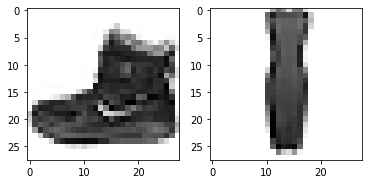

In [8]:
f, ax = plt.subplots(1, 2)
ax[0].imshow(x_train[0].reshape(28, 28), cmap="Greys")
ax[1].imshow(x_train[59].reshape(28, 28),cmap="Greys")


In [9]:
model = tf.keras.Sequential([
    keras.layers.Conv2D(128,2, activation="relu", padding="same", input_shape=[28,28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32, 2, activation="relu", padding="same"),
    keras.layers.Conv2D(32, 2, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 2, activation="relu", padding="same"),
    
    keras.layers.Conv2D(64, 2, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])

In [78]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [80]:
model.fit(x=x_train, y=y_train,
    validation_data=(x_test, y_test),
    batch_size=16, epochs=10, shuffle = True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3307 - accuracy: 0.8853 - val_loss: 0.2937 - val_accuracy: 0.8989
Epoch 2/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3068 - accuracy: 0.8921 - val_loss: 0.2926 - val_accuracy: 0.8945
Epoch 3/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2927 - accuracy: 0.8974 - val_loss: 0.2827 - val_accuracy: 0.9023
Epoch 4/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2827 - accuracy: 0.9003 - val_loss: 0.2803 - val_accuracy: 0.9043
Epoch 5/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2731 - accuracy: 0.9043 - val_loss: 0.2911 - val_accuracy: 0.8976
Epoch 6/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2670 - accuracy: 0.9077 - val_loss: 0.2622 - val_accuracy: 0.9089
Epoch 7/10
60000/60000 [==========================

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        16416     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          1

In [ ]:
tf.config.get_visible_devices()